Import Library

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
#load data
df = pd.read_csv("datasets/flight_prediction.csv")
print(df.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [5]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time     

In [ ]:
#dropdown kolom yang gak perlu
df.drop(columns=['Unnamed: 0', 'flight'], inplace=True)

One-hot encoding

In [7]:
#encode kolom kategori jadi angka pake pd.get_dummies()
df = pd.get_dummies(df, columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'], drop_first=True)


In [8]:
print(df.head())
print(df.info())

   duration  days_left  price  airline_Air_India  airline_GO_FIRST  \
0      2.17          1   5953              False             False   
1      2.33          1   5953              False             False   
2      2.17          1   5956              False             False   
3      2.25          1   5955              False             False   
4      2.33          1   5955              False             False   

   airline_Indigo  airline_SpiceJet  airline_Vistara  source_city_Chennai  \
0           False              True            False                False   
1           False              True            False                False   
2           False             False            False                False   
3           False             False             True                False   
4           False             False             True                False   

   source_city_Delhi  ...  arrival_time_Evening  arrival_time_Late_Night  \
0               True  ...               

Cek Outlier


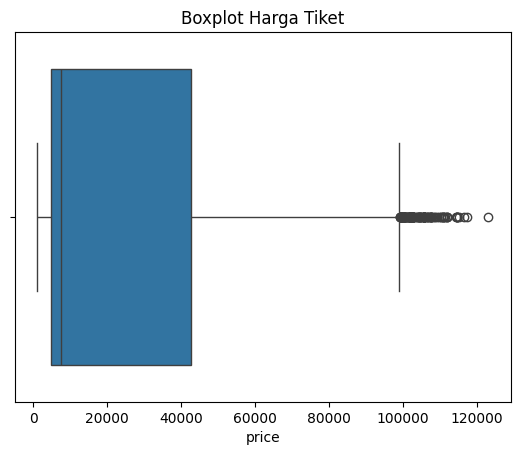

In [10]:
sns.boxplot(x=df['price'])
plt.title("Boxplot Harga Tiket")
plt.show()

In [12]:
#buang outlier dari kolom price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

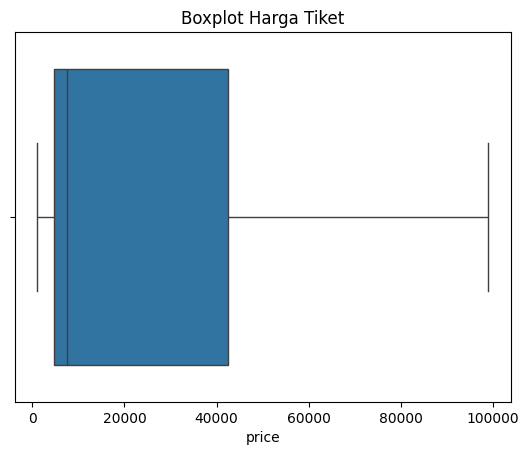

In [13]:
sns.boxplot(x=df['price'])
plt.title("Boxplot Harga Tiket")
plt.show()

Normalisasi kolom numerik

In [17]:
!pip install scikit-learn

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['duration', 'days_left']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [19]:
# Simpan hasil preprocessing
df.to_csv("processed_flight_data.csv", index=False)